In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [1]:
import pandas as pd

In [ ]:
a = pd.read

In [2]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})
data.head()

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0


In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy') #создали классификатор, может обучаться, предсказывать и так далее
clf

DecisionTreeClassifier(criterion='entropy')

In [7]:
X = data[['X_1', 'X_2']]
y = data.Y
X

,X_1,X_2
0,1,0
1,1,0
2,1,0
3,0,1
4,0,0
5,0,0
6,0,0
7,1,1


In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

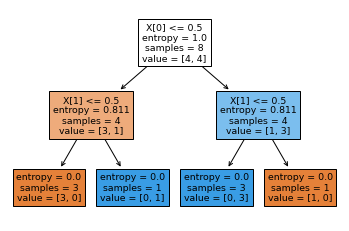

In [9]:
from sklearn.tree import plot_tree
plot_tree(clf,filled=True)

[Text(167.4, 181.2, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

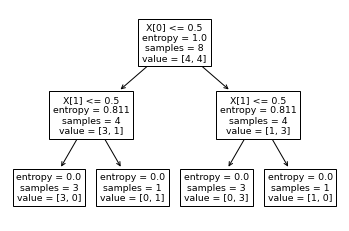

In [10]:
tree.plot_tree(clf)

Энтропия, используемая выше, это показатель уровня неопределенности. Зависит от многих параметров. Например, если вы спросите меня, где я живу, и я отвечу: в России, то моя энтропия для вас будет высока, всё-таки Россия большая страна. Если же я назову вам свой почтовый индекс: 603081, то моя энтропия для вас понизится, поскольку вы получите больше информации.

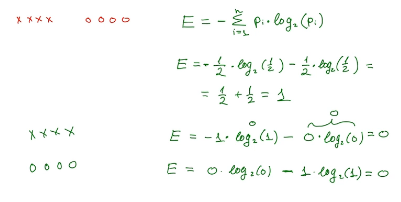

Разберем на примере. Пусть крестик - пассажир Титаника погиб, а кружочек - выжил. Для энтропии справедлива формула выше, где Pi - вероятность некоего события.

В первом случае нет никаких признаков, мы можем сказать, что с вероятностью 50% следующий человек выживет (и она такая же, как и то, что умрет). Поэтому имеем полную неопределенность, то есть энтропия равна единице.

Во втором и третьем случаях имеем, что можно абсолютно точно сказать, к какому классу будет принадлежать следующий пассажир. Поэтому энтропия, то есть неопределенность, будет равна нулю, то есть все четко и понятно.

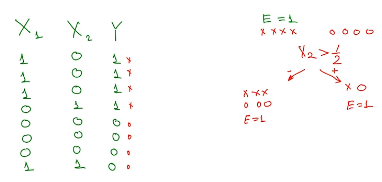
Тут мы выбрали в качестве фичи переменную Х_2. Увидели, что энтропия не снизилась, следовательно, нам такой ход не подходит, алгоритм отметает его.

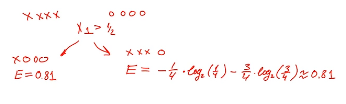
А вот тут уже нам все подходит.

Для рассчета лучшего разбиения подмножеств используется критерий IG (information gain). Он равен разности исходной энтропии и энтропии с учетом выбора фичи, причем энтропия с фичей будет рассчитываться как доля подмножества от начального множества, умноженная на энтропию данного подмножества с учетом фичи.

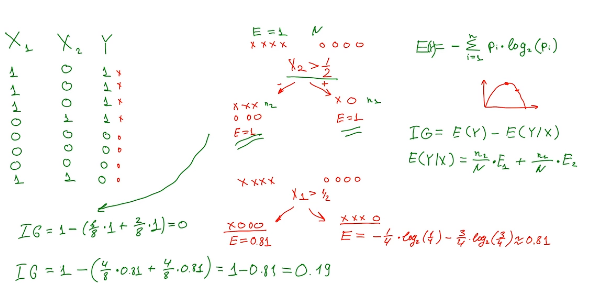
Здесь показано на примере, E(Y/X)-энтропия с учетом фичи. По пути, где IG больше, наше дерево и должно нас вести.
Так же все идет по дереву ниже, только добавляются еще фичи и смотрится связка.

In [15]:
from scipy.stats import entropy


def ent(data):
    return entropy(data.Вид.value_counts() / len(data), base=2)


def ig(data, feature):
    ent0 = ent(data[data[feature] == 0])
    ent1 = ent(data[data[feature] == 1])
    n = len(data)
    n0 = len(data[data[feature] == 0])
    n1 = len(data[data[feature] == 1])
    return ent(data) - ent0 * n0 / n - ent1 * n1 / n


df = pd.DataFrame()
df["Шерстист"] = [1,1,1,1,1,1,1,1,1,0]
df["Гавкает"] = [1,1,1,1,0,0,0,0,1,0]
df["Лазает по деревьям"] = [0,0,0,0,1,1,1,1,1,1]
df["Вид"] = [1,1,1,1, 0,0,0,0,0,0]

print('IG по шертистости: ', ig(df, 'Шерстист'))
print('IG по голосу: ', ig(df, 'Гавкает'))
print('IG по деревьям: ', ig(df, 'Лазает по деревьям'))

IG по шертистости:  0.07898214060026876
IG по голосу:  0.6099865470109876
IG по деревьям:  0.9709505944546688


# Тут начинается Titanic

In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.isnull() ###возвращает для каждого наблюдения F or T в зависимости от того, есть значение или нет

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis= 1)
y = titanic_data.Survived
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [6]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


Так как дерево умеет работать только с числами, то мы разбили все столбцы до True/False. Для этого ищутся юники и в соответствии с ними создаются столбцы так, чтобы однозначно можно было определить класс объекта с помощью True/False. Для этого здесь используется get_dummies от Pandas, который сам понимает, какие колонки ему надо разбить. А можно пользоваться лейбл энкодингом, он просто создает словарь значений и кодирует все цифрами (то есть вместо C тут, например, было бы 0, вместо Q - 1, вместо S - 2 и так далее.

In [7]:
X.Age.median()

28.0

In [8]:
X = X.fillna({'Age':X.Age.median()})
X.head() ###заполнили пропуски в возрасте медианой от возраста

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

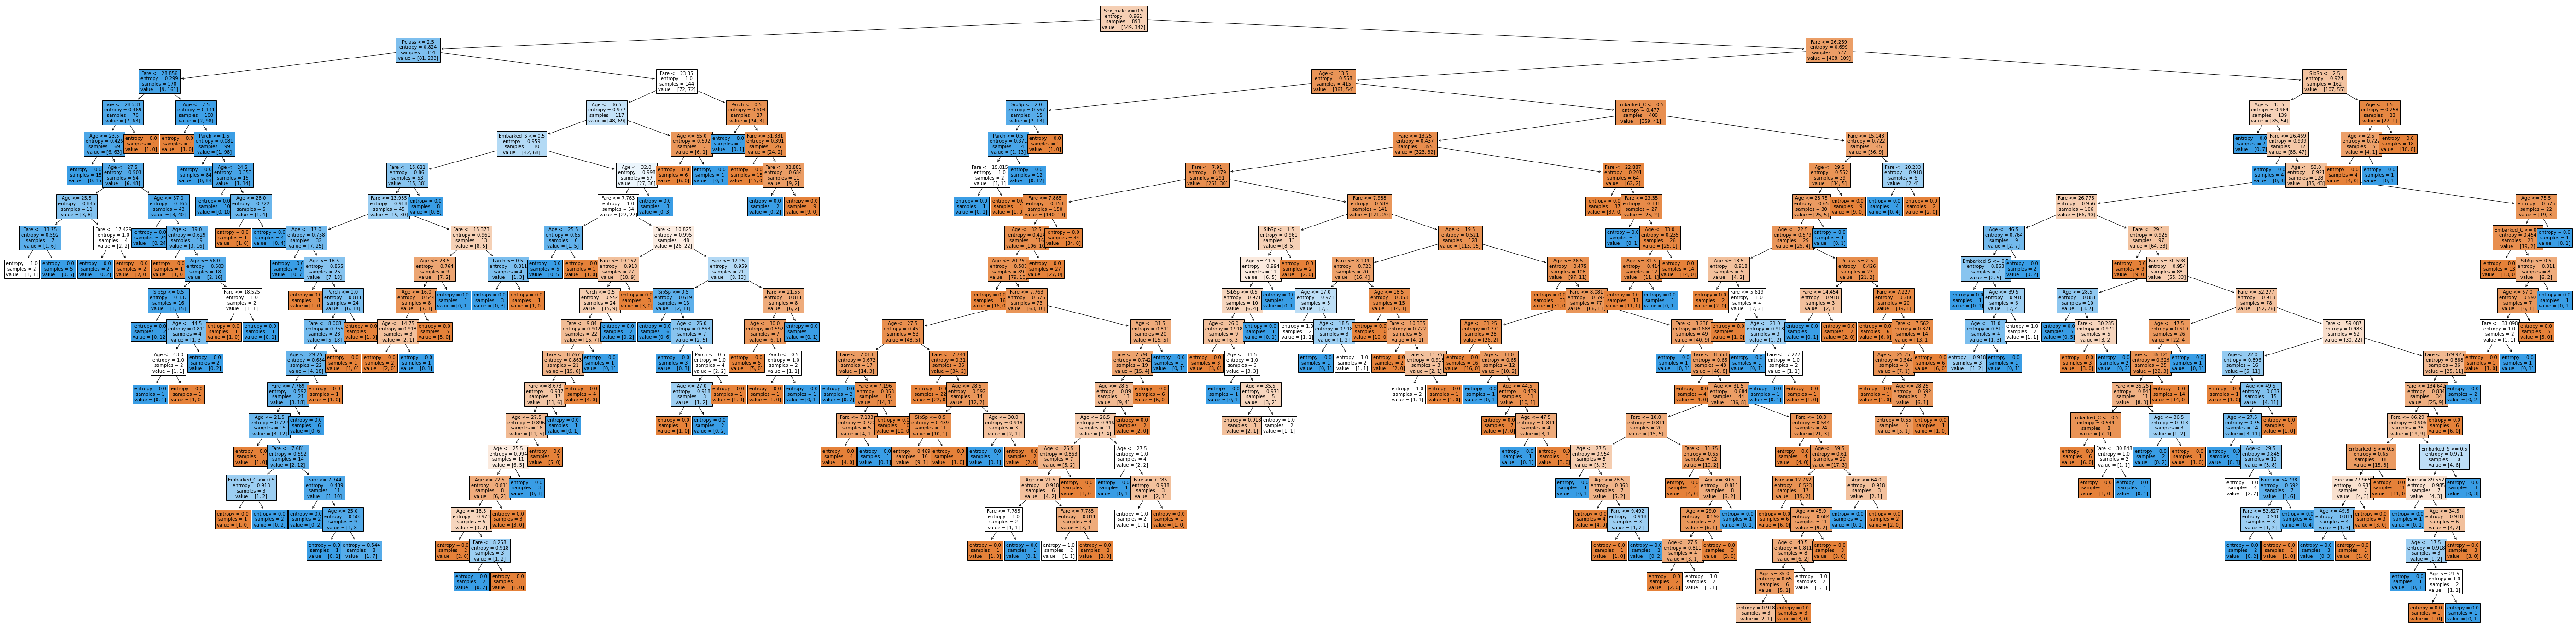

In [11]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True); ###точку с запятой использовали, чтобы убрать этот текст, который был в прошлый раз

Эта модель дико переобучена, она скорее не решает задачу ML, а пытается с максимальной точностью классифицировать конкретный датафрейм.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Разбиваем наш датафрейм в пропорции 1/3 на тестовое множество (test_size)
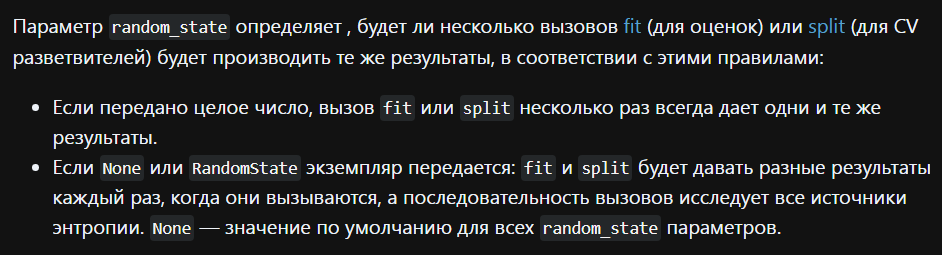
(CV - кросс-валидация)

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
clf.score(X_train, y_train) ###score() позволяет нам вывести результат, долю верных ответов.

0.9798657718120806

In [22]:
clf.score(X_test, y_test)

0.7762711864406779

Видим, что показатели сильно рознятся, это произошло как раз из-за переобучения.

Дабы дерево не пыталось подобрать критерии для 100% правильности, ограничим ему глубину, чтобы оно как бы задавало главные вопросы, искала ОБЩУЮ закономерность, а не закономерность конкретного датасета. Далее сравним результаты.

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [24]:
clf.score(X_train, y_train)

0.8406040268456376

In [25]:
clf.score(X_test, y_test)

0.8101694915254237

Тут числа уже намного ближе друг к другу.

In [27]:
scores_data = pd.DataFrame()

In [29]:
max_depth_values = [i for i in range(1,100)]
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score':[test_score]})
    ### квадратные скобки так как ставим в соответствие только одно значение, а не array
    scores_data = pd.concat([scores_data, temp_score_data]) #concat = append

In [30]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


Тут мы просто сделали датафрейм из глубин деревьев и скоров на тренинговой и тестовой выборках, чтобы построить график и найти лучшее сочетание.

In [33]:
scores_data_long = pd.melt(scores_data, id_vars= ['max_depth'], value_vars= ['train_score', 'test_score'],
                          var_name= 'set_type', value_name= 'score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


melt() "переворачивает" (unpivots) фрейм данных (DataFrame) из широкого формата (wide format) в длинный (long format). id_vars отвечает за исходную группировку, value_vars отвечает за переменные, значения которых мы хотим использовать для скора, var_name отвечает за то, какой у нас будет тип ключа (train или test), value_name - название колонки со значениями.

<AxesSubplot:xlabel='max_depth', ylabel='score'>

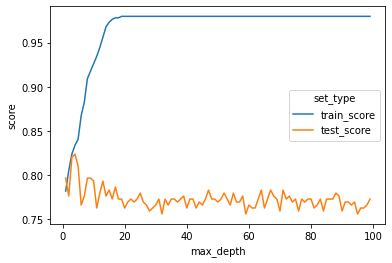

In [35]:
sns.lineplot(x='max_depth', y='score', hue= 'set_type', data= scores_data_long) #hue - цвет.

Из графика видим, что лучше всего тестовые скоры на глубине где-то от 3 до 5 (можем просто найти максимум и узнать), а дальше уже начинается переобучение, и этот скор начинает падать.

In [61]:
scores_data[scores_data.test_score == scores_data.test_score.max(axis= 0)] ###именно так ищутся конкретные элементы.

,max_depth,train_score,test_score
0,4,0.833893,0.823729


Точное значение равно четырем, можем сделать его в качестве глубины.

In [63]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
print('train_score', clf.score(X_train, y_train))
print('test score', clf.score(X_test, y_test))

train_score 0.8338926174496645
test score 0.823728813559322


Но это еще не решило проблему переобучения (а окончательно решить ее вообще невозможно). Все равно модель пытается подбирать параметры для лучшего результата на конкретном тесте. Для решения этого вопроса используется валидация.

train dataset используется для тренировки модели, validation - для её проверки, тестовый датасет выступает как ещё один уровень проверки, которая происходит на не показанных модели ранее данных.

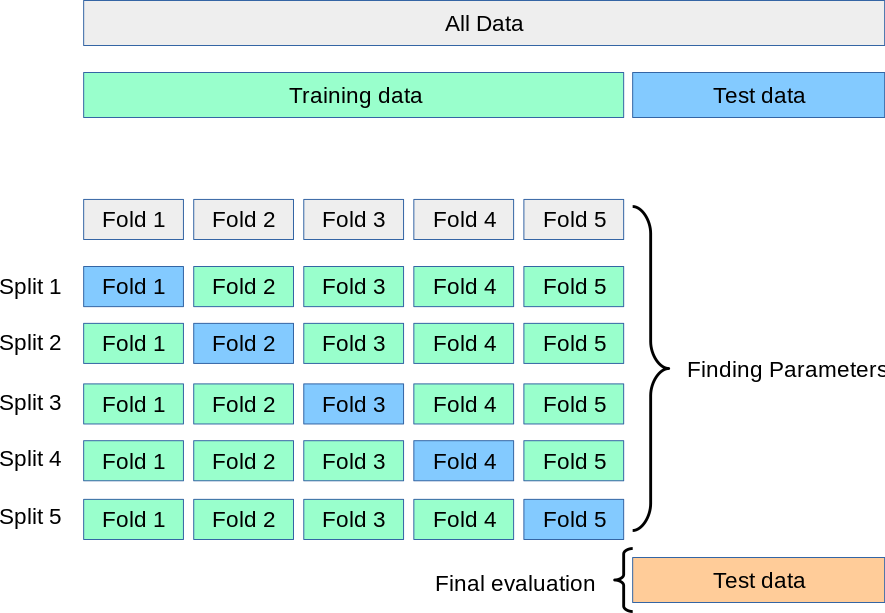
Принцип работы кросс-валидации.

Итого три уровня:
1) Тренировочные - учим

2) Валидационные - проверям как научили: если плохо - возвращаемся на шаг 1 с другими параметрами модели

3) Предсказываем данные - здесь точность уже не проверишь, поэтому до этого шага доходит лучшая из построенных моделей

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf, X_train, y_train, cv= 5) #cv - количество тех самых кусков.

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [70]:
cross_val_score(clf, X_train, y_train, cv= 5).mean() #возьмем среднее значение

0.7886274509803922

<AxesSubplot:xlabel='max_depth', ylabel='score'>

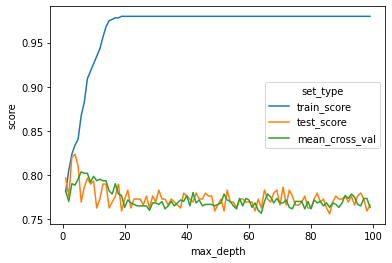

In [75]:
scores_data1 = pd.DataFrame()
max_depth_values1 = [i for i in range(1,100)]
for max_depth in max_depth_values1:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    mean_cross_val = cross_val_score(clf, X_train, y_train, cv= 5).mean()
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score':[test_score],
                                    'mean_cross_val': [mean_cross_val]})
    scores_data1 = pd.concat([scores_data1, temp_score_data])
scores_data_long1 = pd.melt(scores_data1, id_vars= ['max_depth'], value_vars= ['train_score', 'test_score', 'mean_cross_val'],
                          var_name= 'set_type', value_name= 'score')
sns.lineplot(x='max_depth', y='score', hue= 'set_type', data= scores_data_long1)

Сделали по принципу, описанному выше, но еще докинули валидацию.

In [76]:
scores_data1.head()

,max_depth,train_score,test_score,mean_cross_val
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [77]:
scores_data1[scores_data1.mean_cross_val == scores_data1.mean_cross_val.max()]

,max_depth,train_score,test_score,mean_cross_val
0,6,0.86745,0.769492,0.803754


Забьем этот max_depth как лучший для нашего классифаера.

In [78]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7661016949152543

<AxesSubplot:xlabel='max_depth', ylabel='score'>

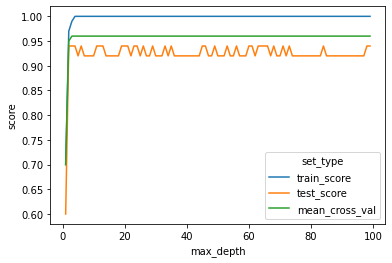

In [13]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

df_train = pd.read_csv("train_iris.csv", index_col=0)
df_test = pd.read_csv("test_iris.csv", index_col=0)

X_train = df_train.drop(['species'], axis= 1)
X_test = df_test.drop(['species'], axis= 1)
y_train = df_train['species']
y_test = df_test['species']

rs = np.random.seed(0)
scores_data = pd.DataFrame()
max_depth_values1 = range(1, 100)
for max_depth in max_depth_values1:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    mean_cross_val = cross_val_score(clf, X_train, y_train, cv= 5).mean()
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score':[test_score],
                                    'mean_cross_val': [mean_cross_val]})
    scores_data = pd.concat([scores_data, temp_score_data])
scores_data_long1 = pd.melt(scores_data, id_vars= ['max_depth'], value_vars= ['train_score', 'test_score', 'mean_cross_val'],
                          var_name= 'set_type', value_name= 'score')
sns.lineplot(x='max_depth', y='score', hue= 'set_type', data= scores_data_long1)

#  Пробуем другую графику с деревом по Титанику

train_score 0.8338926174496645
test score 0.823728813559322


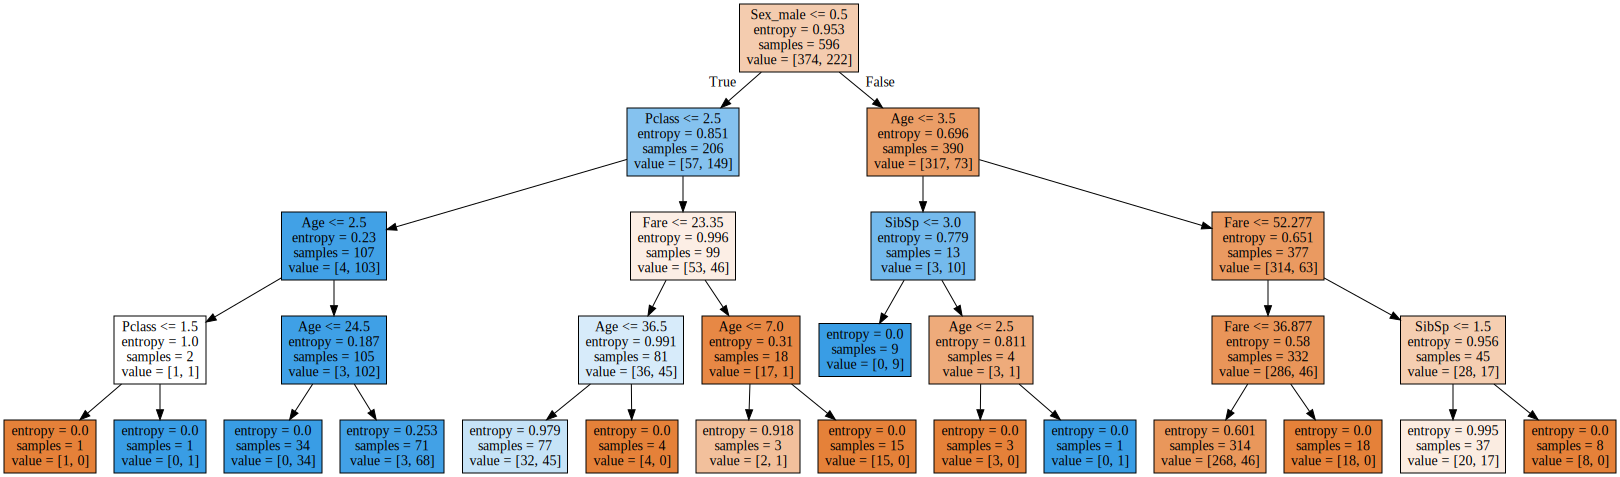

In [21]:
import pandas as pd
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
import numpy as np
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import graphviz
%matplotlib inline


titanic_data = pd.read_csv("train.csv")
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis= 1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age':X.Age.median()})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf1.fit(X_train, y_train)
print('train_score', clf1.score(X_train, y_train))
print('test score', clf1.score(X_test, y_test))
dot_data = skl.tree.export_graphviz(clf1, feature_names=list(X), filled=True, out_file=None)
graph = graphviz.Source(dot_data)  
graph

# Отделяем котов от собак

In [14]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

df_train = pd.read_csv("dogs_n_cats.csv", index_col=0)
df_train.head()

,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
Длина,,,,,
15,18.0,1,1,0,собачка
20,24.0,1,0,0,собачка
34,40.8,1,1,0,собачка
26,31.2,1,1,0,собачка
16,19.2,1,1,0,собачка


In [16]:
X_train = df_train.drop(['Вид'], axis= 1)
X_test = df_train['Вид']
X_train.head()

,Высота,Шерстист,Гавкает,Лазает по деревьям
Длина,,,,
15,18.0,1,1,0
20,24.0,1,0,0
34,40.8,1,1,0
26,31.2,1,1,0
16,19.2,1,1,0


# Метрики качества

Метрика acuracy (общий процент правильных ответов) не всегда, точнее, на ограниченном круге задач дает нам действительную картину происходящего, ведь в ситуации определения отлетевших с курса учеников, если бы она раздавала всем метки "отлетел", то точность была бы около 90%, хотя в принципе пользователей она бы классифицировала неверно. Нам важно, чтобы модель работала корректно и классифицировала объекты правильно (то есть, в задаче бинарной классификации, объект класса "0" за объект класса "0", а объект класса "1" за объект класса "1" или же чтобы был очень высокий процент True Positive и True Negative). 

## Разберем Precision Recall

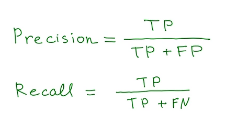

Грубо говоря, Precision - это отношение верно определенных объектов нужного класса (нужно найти, где самолеты, и наша модель верно определила некоторое число N самолетов, это число N и будет TP) к сумме того же TP и неверно определенных объектов нужного класса (модель выдала корабль за самолет, то есть отнесла объект ненужного класса к нужному, это и будет FP, некий ложный вызов). Recall же - отношение TP к сумме TP и неверно определенных объектов второго класса (то есть модель выдала самолет за корабль, то есть не заметила самолет).

Существует две ситуации, когда наш классификатор ошибается: когда он определяет все самолеты, но добавляет еще кучу лишнего (это Precision) и когда он определяет верно самолеты (не добавляет лишнего), но при этом еще эти самолеты упускает - это Recall.

Верхняя ситуация - слабый Precision (точность), а нижняя - слабый Recall (полнота).

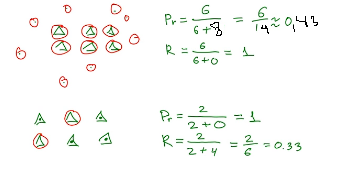

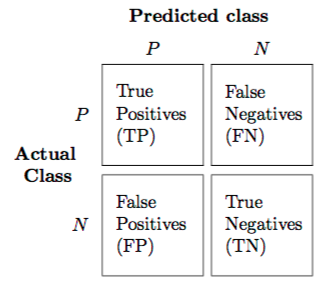

Метрика F1 более точная для общего случая - она ищет среднее гармоническое между Precision и Recall, также можно задать параметр, который будет определять некий приоритет при равных остальных.

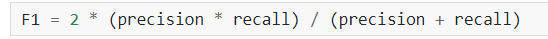

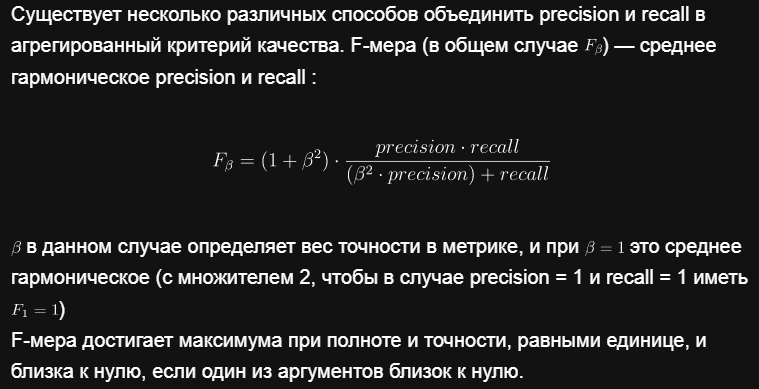
Общий вид

Хорошая статья на Хабре: https://habr.com/ru/company/ods/blog/328372/

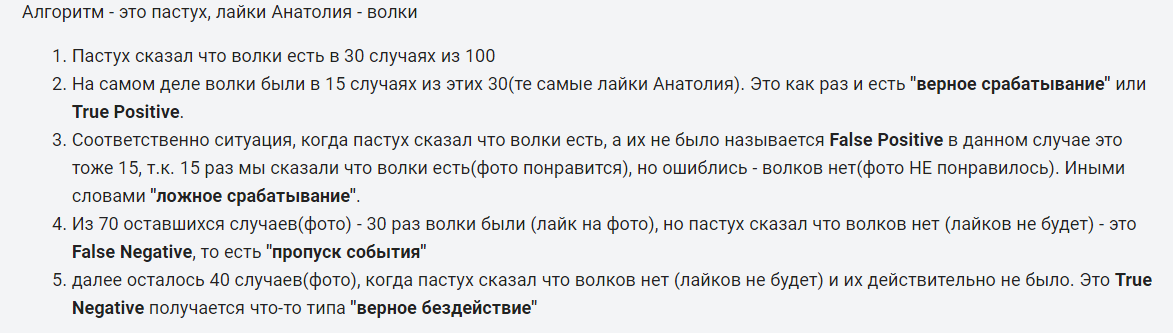

https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative?hl=ru

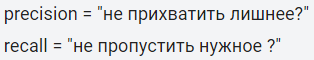

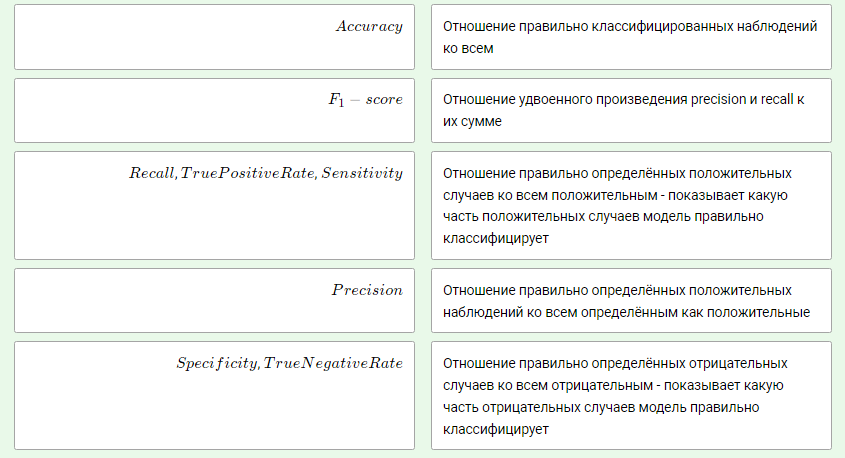

# Ласт задача с метриками

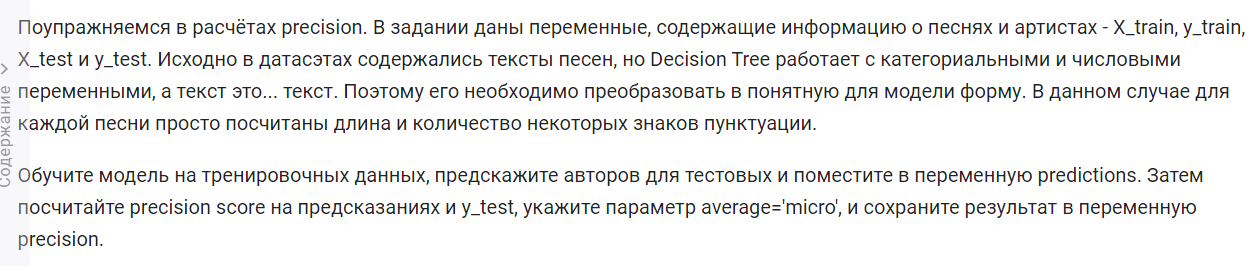

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import precision_score
precision = precision_score(predictions, y_test, average='micro')

# Начинается тест регрессора

In [1]:
import pandas as pd
import sklearn as skl
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score
import numpy as np
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

pl = [26, 81, 42, 27, 60, 48, 57, 7, 72, 23, 58, 59, 1, 74, 28, 21, 36, 33, 37, 11, 69, 9, 95, 13, 100, 52, 4, 96, 30, 75, 8, 49, 67, 53, 25, 22, 34, 86, 15, 32, 55, 5, 24, 87, 91, 98, 43, 89, 20, 76, 29, 31, 63, 70, 61, 3, 79, 17, 94, 82, 40, 65, 66, 99, 62, 56, 45, 41, 88, 68, 19, 71, 12, 54, 83, 39, 35, 97, 10, 47, 44, 14, 50, 16, 90, 51, 77, 18, 6, 78]
data = []
f = 7
for i in pl:
    k = 0
    ser = []
    cnt = 50
    while k < f:
        if k != 0:
            cnt += ((-1) ** (ser[k-1]+1))*(100/(2**(k+1)))
        if i >= cnt:
            ser.append(1)
        else:
            ser.append(0)
        k += 1
    ser.append(i)
    data.append(ser)
dataf = pd.DataFrame(data)

X = dataf.drop([f], axis= 1)
y = dataf[f]

clf2 = DecisionTreeRegressor(max_depth = 7)
clf2 = clf2.fit(X, y)

pred = [0,1,0,1,1,1,0] #разобраться с целыми предиктами!
pred_1 = pred
pred_1[-1] = 1
pred_0 = pred[:-1]
pred_0.append(0)
pred_fin = (clf2.predict([pred_0]) + clf2.predict([pred_1])) / 2
print(math.floor(pred_fin) if pred[-1] == 0 else math.ceil(pred_fin))
print(pred_fin)

37
[36.5]


# Подбор параметров и GridSearchCV

In [5]:
import pandas as pd
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
import numpy as np
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

titanic_data = pd.read_csv("train.csv")
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis= 1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age':X.Age.median()})

clf = DecisionTreeClassifier()
random_state = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
params = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30)} 
grid_Search_cv_clf = GridSearchCV(clf, params, cv=5)

np.random.seed(7)
grid_Search_cv_clf.fit(X_train, y_train)
best_clf = grid_Search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [6]:
clf1 = DecisionTreeClassifier()
params = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30)} #'min_samples_leaf': range(1,5), 'min_samples_split':range(2,5)} 
grid_Search_cv_clf1 = GridSearchCV(clf1, params, cv=5)
np.random.seed(7)
grid_Search_cv_clf1.fit(X_train, y_train)
grid_Search_cv_clf1.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [7]:
best_clf1 = grid_Search_cv_clf1.best_estimator_
print('test score',best_clf1.score(X_test, y_test))
cross_val_score(best_clf1, X_train, y_train, cv= 5).mean()

test score 0.8


0.8070868347338935

Разберись в параметрах DecisionTreeClassifier!

In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_prec = best_clf1.predict(X_test)
print('Precision = ',precision_score(y_test, y_prec))
print('Recall = ', recall_score(y_test, y_prec)) #очень низкий recall
print('F1 = ', f1_score(y_test, y_prec))

Precision =  0.8210526315789474
Recall =  0.65
F1 =  0.7255813953488371


In [13]:
y_pred_prob = best_clf1.predict_proba(X_test)
y_pred_prob[:10]

array([[0.8852459 , 0.1147541 ],
       [0.61538462, 0.38461538],
       [0.8852459 , 0.1147541 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.8852459 , 0.1147541 ],
       [0.25      , 0.75      ],
       [0.        , 1.        ]])

Таким образом, у нас в дереве хранятся вероятности принадлежности к какому-то классу. То есть можно тюнить порог отсечения, когда наше дерево будет считать объект принадлежащим к классу (начиная с какой вероятности, дефолтная - 0.5).

<AxesSubplot:>

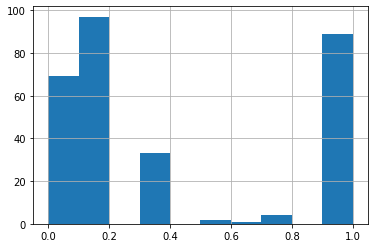

In [14]:
pd.Series(y_pred_prob[:, 1]).hist()

Попробуем повысить наш recall - опустим планку отсеивания до 0.2

In [16]:
y_pred1 = np.where(y_pred_prob[:, 1] > 0.2, 1, 0) #where здесь позволяет поменять значения по порогу
print('Precision = ', precision_score(y_test, y_pred1))
print('Recall = ',recall_score(y_test, y_pred1))

Precision =  0.7596899224806202
Recall =  0.8166666666666667


Видим, что precision упал, зато recall вырос. Теперь посмотрим на показатели f-меры.

In [17]:
f1_score(y_test, y_pred1)

0.7871485943775101

Из формулы f1 итак было понятно, но тут нагляднее))) Ясно, что f-мера тоже выросла, это супер.

Для того, чтобы отобрать лучший порог отсечения, используется roc-кривая.

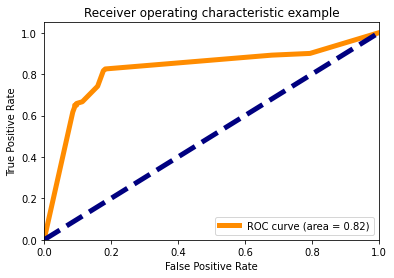

In [18]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Эта тема работает с метриками TPR и FRP.

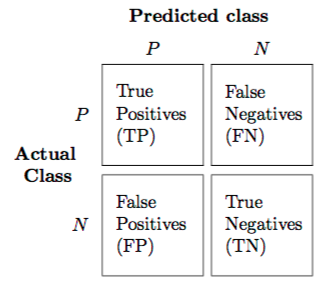

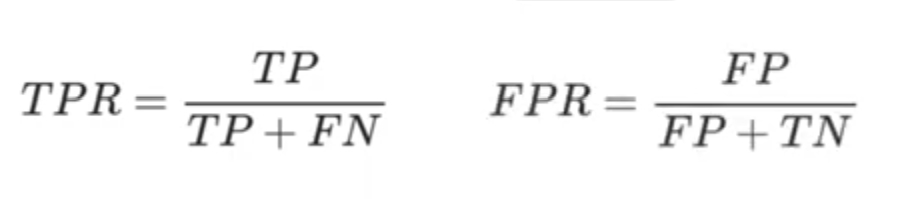

TPR - отношение числа верных срабатываний к размеру положительного класса (фактического) - полнота, должна стремиться к единице.

FPR - отношение числа ложных срабатываний к размеру отрицательного класса (фактического) - аналог полноты для ошибок, должна стремиться к нулю.

AUC - площадь под ROC-кривой, изменяется от 0 до 1, стремиться надо к единице (то есть чтобы была просто прямая параллельная нижней оси, проходящая через (0, 1)).

In [23]:
y_pred1 = np.where(y_pred_prob[:, 1] >= 0.189, 1, 0)
print('Precision = ',precision_score(y_test, y_pred1))
print('Recall = ', recall_score(y_test, y_pred1))

Precision =  0.7596899224806202
Recall =  0.8166666666666667


https://translated.turbopages.org/proxy_u/en-ru.ru.7e377643-63f4d257-46d48b5e-74722d776562/https/www.tutorialspoint.com/scikit_learn/scikit_learn_decision_trees.htm
Тут про параметры деревьев.

# Практика из 2.7

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

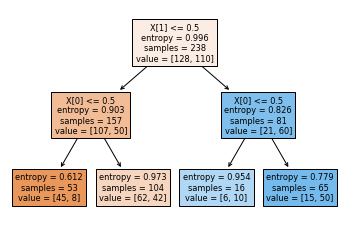

In [1]:
import pandas as pd
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
import numpy as np
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
%matplotlib inline

tree_data = pd.read_csv("train_data_tree.csv")
X_train = tree_data.drop(['num'], axis= 1)
y_train = tree_data.num

clf = DecisionTreeClassifier(criterion= 'entropy')
clf.fit(X_train, y_train)

plot_tree(clf, filled= True)

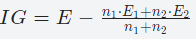

Считаем Information Gain: E - энтропия в корне, n1 - количество сэмплов слева, E1 - энтропия слева.

In [31]:
0.996- (157*0.903 + 81*0.826)/238

0.11920588235294105